Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [23]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import yelp dataset
df = pd.read_csv(r'C:\Users\AP\Desktop\yelp_clean.csv')

# rename columns
df.columns = ['review', 'sentiment']

In [3]:
# sample view of data
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# basic size and shape of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
review       1000 non-null object
sentiment    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [5]:
# number of nulls 
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# unique values
df.nunique()

review       996
sentiment      2
dtype: int64

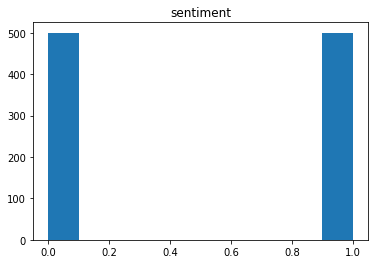

1    500
0    500
Name: sentiment, dtype: int64

In [9]:
# histogram of positive/ negative sentiment

plt.hist(df['sentiment'])
plt.title('sentiment')
plt.show()

df.sentiment.value_counts()

Sentiment is equal between positive and negative reviews.

In [10]:
# import positive and negative keywords dataset
# source: http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
df_neg = pd.read_csv(r'C:\Users\AP\Desktop\negative words.csv')
df_pos = pd.read_csv(r'C:\Users\AP\Desktop\positive words.csv')

In [11]:
df_pos.head(40)

,Column1,Column2,Column3,Column4,Column5
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,NaN,NaN,NaN,NaN
1,;,NaN,NaN,NaN,NaN
2,; Opinion Lexicon: Positive,NaN,NaN,NaN,NaN
3,;,NaN,NaN,NaN,NaN
4,; This file contains a list of POSITIVE opinio...,NaN,NaN,NaN,NaN
5,;,NaN,NaN,NaN,NaN
6,; This file and the papers can all be download...,NaN,NaN,NaN,NaN
7,; http://www.cs.uic.edu/~liub/FBS/sentiment...,NaN,NaN,NaN,NaN
8,;,NaN,NaN,NaN,NaN
9,; If you use this list,please cite one of the following two papers:,NaN,NaN,NaN


In [12]:
df_neg.head(40)

,Column1,Column2,Column3,Column4,Column5
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,NaN,NaN,NaN,NaN
1,;,NaN,NaN,NaN,NaN
2,; Opinion Lexicon: Negative,NaN,NaN,NaN,NaN
3,;,NaN,NaN,NaN,NaN
4,; This file contains a list of NEGATIVE opinio...,NaN,NaN,NaN,NaN
5,;,NaN,NaN,NaN,NaN
6,; This file and the papers can all be download...,NaN,NaN,NaN,NaN
7,; http://www.cs.uic.edu/~liub/FBS/sentiment...,NaN,NaN,NaN,NaN
8,;,NaN,NaN,NaN,NaN
9,; If you use this list,please cite one of the following two papers:,NaN,NaN,NaN


The list of words in the dataset do not start until row 35. Rows 1-34 are useless.

In [13]:
# resize data
df_neg = df_neg.iloc[35:]
df_pos = df_pos.iloc[35:]

In [14]:
# drop unnecessary columns
df_neg.drop(['Column2', 'Column3', 'Column4', 'Column5'], axis=1, inplace=True)
df_pos.drop(['Column2', 'Column3', 'Column4', 'Column5'], axis=1, inplace=True)

In [15]:
df_pos.head(3)

,Column1
35,a+
36,abound
37,abounds


In [16]:
df_neg.head(3)

,Column1
35,2-faced
36,2-faces
37,abnormal


Positive and negative keyword lists are now just one column each.

In [17]:
# convert words in columns to list
list_neg = list(df_neg['Column1'])
list_pos = list(df_pos['Column1'])

In [18]:
# remove non-letter characters from lists
import re

list_pos = [re.sub('[^A-Za-z0-9]+', '', mystring) for mystring in list_pos]
list_pos = list(set(list_pos))

list_neg = [re.sub('[^A-Za-z0-9]+', '', mystring) for mystring in list_neg]
list_neg = list(set(list_neg))

In [19]:
# match keyword list to reviews
keywords = list_neg + list_pos

for key in keywords:
    # add spaces around key so we're getting the word, not just pattern matching
    df[str(key)] = df.review.str.contains(' ' + str(key) + ' ',case=False)

In [20]:
# turn sentiment column to boolean
df['sentiment'] = (df['sentiment'] == 1)

In [21]:
# define variables for bernoulli classifier
data = df[keywords]
target = df['sentiment']

In [22]:
# import bernoulli classifier (data is binary/boolean)
from sklearn.naive_bayes import BernoulliNB

# instantiate model and store in new variable
bnb = BernoulliNB()

# fit model to data
bnb.fit(data, target)

# classify, store result in new variable
y_pred = bnb.predict(data)

# display results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 254


Need some clarification of how to interpret this result. Using the above keywords, this classifier can predict a positive or negative review with 74.6% accuracy. 